In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle

In [2]:
movies=pd.read_csv('C:\\Users\\bharadwaj YVRao\\Desktop\\skilling for engineering-ML\\archive\\movie.csv')
tags=pd.read_csv('C:\\Users\\bharadwaj YVRao\\Desktop\\skilling for engineering-ML\\archive\\tag.csv')
ratings=pd.read_csv('C:\\Users\\bharadwaj YVRao\\Desktop\\skilling for engineering-ML\\archive\\rating.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
movies['genres']=movies['genres'].str.replace('|',' ')

In [6]:
len(movies.movieId.unique())

27278

In [7]:
len(ratings.movieId.unique())

26744

In [8]:
ratings_f=ratings.groupby('userId').filter(lambda x: len(x) >= 55)
movie_list_rating=ratings_f.movieId.unique().tolist()
ratings_f.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [9]:
ratings_f.drop(['timestamp'],1,inplace=True)
ratings_f.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [10]:
len(ratings_f.movieId.unique())/len(movies.movieId.unique()) * 100

97.85908057775497

In [11]:
len(ratings_f.userId.unique())/len(ratings.userId.unique()) * 100

57.797867040211415

In [12]:
movies=movies[movies.movieId.isin(movie_list_rating)]
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


movies.head(3)

In [13]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance


In [14]:
Mapping_file=dict(zip(movies.title.tolist(),movies.movieId.tolist()))

In [15]:
tags.drop(['timestamp'],1,inplace=True)
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [16]:
mixed=pd.merge(movies,tags,on='movieId',how='left')
mixed.head(3)

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature


In [17]:
mixed.fillna("",inplace=True)
mixed=pd.DataFrame(mixed.groupby('movieId')['tag'].apply(
                                                    lambda x: "%s" % ' '.join(x)))
Final=pd.merge(movies,mixed,on='movieId',how='left')
Final['metadata']=Final[['tag','genres']].apply(
                                            lambda x:' '.join(x),axis=1)
Final[['movieId','title','metadata']].head(3)

,movieId,title,metadata
0,1,Toy Story (1995),Watched computer animation Disney animated fea...
1,2,Jumanji (1995),time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),old people that is actually funny sequel fever...


In [44]:
Final.shape

(26694, 5)

# creating a content latent matrix from movie metadata

# tf-idf vecotrs  and truncated SVD:

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf=TfidfVectorizer(stop_words='english')

In [20]:
tfidf_matrix=tfidf.fit_transform(Final['metadata'])

In [21]:
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(),index=Final.index.tolist())

In [22]:
print(tfidf_df.shape)

(26694, 23704)


In [23]:
Final.loc[0,"metadata"]

"Watched computer animation Disney animated feature Pixar animation TÃ©a Leoni does not star in this movie Pixar animation family Tom Hanks Pixar witty Pixar adventure animated animation clever comedy computer animation family fantasy Tom Hanks bright DARING RESCUES fanciful HEROIC MISSION humorous light rousing TOYS COME TO LIFE UNLIKELY FRIENDSHIPS warm witty animation humorous Pixar time travel Pixar Pixar animation animation kids movie Pixar Pixar Pixar witty Disney Tim Allen time travel action figure action figures Buzz Lightyear CG animation toy toys Woody animation Pixar animation Disney villian hurts toys pixar animation disney fantasy Pixar animation pixar children é˜®ä¸€é¸£ animation computer animation funny humorous Pixar Tom Hanks witty 3D Disney funny Pixar time travel Pixar time travel animation Pixar Cartoon Disney toy toys Pixar Pixar animation pixar animated animation comedy Disney Pixar ya boy clever computer animation Disney fantasy Pixar toys witty animation cgi rat

# The first 200 components explain over 50% of the variance

In [24]:
tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23694,23695,23696,23697,23698,23699,23700,23701,23702,23703
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#compress with svd
from sklearn.decomposition import TruncatedSVD


In [26]:
svd=TruncatedSVD(n_components=200)


In [ ]:
latent_matrix=svd.fit_transform(tfidf_df)


In [55]:
#plot var explained to see what latent dimension to use
explained=svd.explained_variance_ratio_.cumsum()

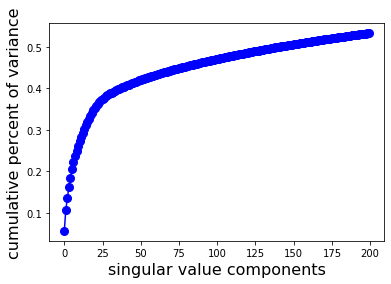

In [59]:
plt.plot(explained,'.-',ms=16,color='blue')
plt.xlabel('singular value components',fontsize=16)
plt.ylabel('cumulative percent of variance',fontsize=16)
plt.show()

In [74]:
#number of latent dimensions to keep
n=200
latent_matrix_l_df=pd.DataFrame(latent_matrix[:,0:n],index=Final.title.tolist())

In [61]:
#our content latent matrix;
latent_matrix.shape

(26694, 200)

# creating a collaborative latent matrix from user ratings: 

In [62]:
ratings_f.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [63]:
ratings_f1=pd.merge(movies[['movieId']],ratings_f,on="movieId",how="right")

In [69]:
ratings_f1.count()

movieId    18062883
userId     18062883
rating     18062883
dtype: int64

In [68]:
ratings_f2=ratings_f1.pivot(index='movieId',columns='userId',values='rating').fillna(0)

MemoryError: Unable to allocate 15.9 GiB for an array with shape (26694, 80046) and data type float64

In [71]:
from sklearn.metrics.pairwise import cosine_similarity

In [76]:
a_1=np.array(latent_matrix_l_df.loc['Toy Story (1995)']).reshape(1,-1)

In [77]:
score_1=cosine_similarity(latent_matrix_l_df,a_1).reshape(-1)

In [78]:
dictDf={'content':score_1}

In [79]:
similar=pd.DataFrame(dictDf,index=latent_matrix_l_df.index)

In [84]:
similar.sort_values('content',ascending=False,inplace=True)

In [86]:
similar[13:].head(11)

,content
George & A.J. (2009),0.715377
Toy Story That Time Forgot (2014),0.710393
Red's Dream (1987),0.707407
Dug's Special Mission (2009),0.706940
Tin Toy (1988),0.706251
The Legend of Mor'du (2012),0.706251
Toy Story Toons: Partysaurus Rex (2012),0.702582
Jack-Jack Attack (2005),0.693604
Your Friend the Rat (2007),0.683818
Knick Knack (1989),0.670053
